### 0. Rozważmy cztery punkty na płaszczyźnie: (0,4), (1,0), (2,0) i (3,0). Jaka prosta przechodzi najbliżej nich? ułóż układ równań liniowych, który można rozwiązać metodą najmniejszych kwadratów. Wykorzystaj funkcje scipy.linalg.qr aby zobaczyć rozkład QR macierzy A. Użyj funkcji scipy. linalg.lstsq aby znaleźć rozwiązanie. Jakie jest znaczenie wartośći zwróconych przez tę funkcje?

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
x = np.arange(4)
y = np.array([4,0,0,0])

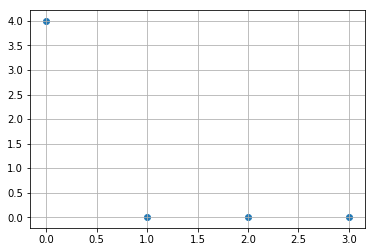

In [21]:
plt.scatter(x,y)
plt.grid()

In [7]:
from scipy import linalg

In [22]:
X = np.concatenate([x[:, np.newaxis], np.ones(x.shape[0])[:, np.newaxis]], axis=1)
q, r = linalg.qr(X)

In [12]:
q

array([[ 0.        , -0.83666003, -0.38578674, -0.38880405],
       [-0.26726124, -0.47809144,  0.22458489,  0.80595386],
       [-0.53452248, -0.11952286,  0.70819044, -0.44549557],
       [-0.80178373,  0.23904572, -0.54698859,  0.02834576]])

In [13]:
r

array([[-3.74165739, -1.60356745],
       [ 0.        , -1.19522861],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [24]:
a, res, rank, s = linalg.lstsq(X, y)
X @ a

array([ 2.8,  1.6,  0.4, -0.8])

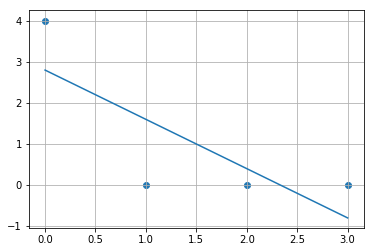

In [25]:
plt.scatter(x, y)
plt.plot(x, X @ a.flatten())
plt.grid()

### 1  Rozważmy dane:

In [ ]:
0.00	4.00000000000000e+00
1.25	3.28650479686019e+00
2.50	3.08208499862390e+00
3.75	3.02351774585601e+00
5.00	3.00673794699909e+00
6.25	3.00193045413623e+00
7.50	0.00055308437015e+00
8.75	3.00015846132512e+00
10.00	3.00004539992976e+00

Jak będzie wyglądało dopasowanie met. najlepszych kwadratów funkcji $f(x)=a\cdot 1 + b\cdot exp(-x)$ do tych danych?

In [36]:
x_pre = np.arange(0, 11, 1.25)
x = np.exp(-x)
y = np.array([4.00000000000000e+00, 3.28650479686019e+00, 3.08208499862390e+00, 3.02351774585601e+00, 3.00673794699909e+00, 3.00193045413623e+00, 0.00055308437015e+00, 3.00015846132512e+00, 3.00004539992976e+00])

X = np.concatenate([x[:, np.newaxis], np.ones(x.shape[0])[:, np.newaxis]], axis=1)
a, res, rank, s = linalg.lstsq(X, y)
a

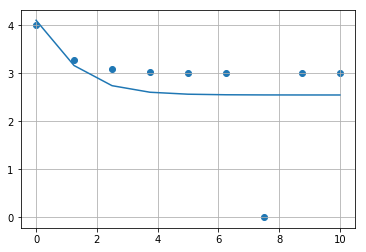

In [74]:
plt.scatter(x_pre, y)
plt.plot(x_pre, X @ a.flatten())
plt.grid()

### 2. Rozważmy dane o obwodzie pnia, trees-stripped ( do wczytywania przyda się funkcja numpy.loadtext). 

Kolejne kolumny oznaczają tu:

obwód pnia<br>
wysokość drzewa<br>
objętość pozyskanego drewna.<br>

Spróbuj dopasować (metodą najmniejszych kwadratów) objętość drzewa jako funkcję:

kombinację liniową obwodu pnia i wysokości drzewa (a*obwod+b*wysokosc+c)<br>
iloczynu wysokości przez obwód (a*wysokosc*obwod+b)<br>
kombinację liniową powyższych (a*wys.+b*obwod+c*wys.*obw+d)<br>
Gdzie uzyskujemy najmniejszy błąd przybliżenia?

In [45]:
import pandas as pd

df = pd.read_csv('trees-stripped.csv', header=None)
df.head()

,0,1,2
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [52]:
y = df.iloc[:, -1].values

#### a)

In [65]:
X_a = df.iloc[:, :-1].values
X_a = np.concatenate([X_a, np.ones(X_a.shape[0])[:, np.newaxis]], axis=1)
A, res, rank, s = linalg.lstsq(X_a, y)

A

array([  4.7081605 ,   0.33925123, -57.98765892])

In [66]:
# błąd przybliżenia:
np.sum((y - X_a @ A)**2)

421.9213592224488

#### b)

In [67]:
X_b = df.iloc[:, :-1].values
X_b = X_b[:, 0] * X_b[:, 1]
X_b = np.concatenate([X_b[:, np.newaxis], np.ones(X_a.shape[0])[:, np.newaxis]], axis=1)
A, res, rank, s = linalg.lstsq(X_b, y)

A

array([  0.05449038, -25.2417025 ])

In [68]:
# błąd przybliżenia:
np.sum((y - X_b @ A)**2)

372.71734835258746

#### c)

In [69]:
X_a = df.iloc[:, :-1].values
X_b = X_a[:, 0] * X_a[:, 1]
X_c = np.concatenate([X_a, X_b[:, np.newaxis], np.ones(X_a.shape[0])[:, np.newaxis]], axis=1)
A, res, rank, s = linalg.lstsq(X_c, y)

A

array([-5.85584793, -1.29708337,  0.13465439, 69.39631556])

In [70]:
# błąd przybliżenia:
np.sum((y - X_c @ A)**2)

198.07856881328584

### 3(*)

Przedstaw na wykresie wynik zadania 1 (wykres punktowy obserwacji i dużo gęściej próbkowany wykres liniowy znalezionej funkcji). Jaki jest problem naszego rozwiązania? czy można jakoś pomóc sobie używając ważonego problemu średnich kwadratów? jak to zrobić dla wagi jednej z obserwacji=0? a jak dla wagi 0.1? Problem ważonych najmniejszych kwadratów uzyskujemy dodając zestaw wag w_i, t. ż. \sum_i w_i = 1, do wzoru z wykładu. Jeśli ktoś nie ma ochoty implementować ważonej metody najmniejszych kwadratów "ręcznie", można wykorzystać funkcję curve_fit z pakiety scipy.optimize, gdzie parametr sigma odpowiada zasadniczo 1/w_i

In [101]:
x_pre = np.arange(0, 11, 1.25)
x = np.exp(-x)
y = np.array([4.00000000000000e+00, 3.28650479686019e+00, 3.08208499862390e+00,
              3.02351774585601e+00, 3.00673794699909e+00, 3.00193045413623e+00,
              0.00055308437015e+00, 3.00015846132512e+00, 3.00004539992976e+00])
X = np.concatenate([x[:, np.newaxis], np.ones(x.shape[0])[:, np.newaxis]], axis=1)
a, res, rank, s = linalg.lstsq(X, y)
a

array([-8.09661662,  8.16682066])

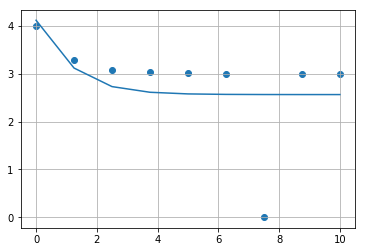

In [102]:
plt.scatter(x_pre, y)
plt.plot(x_pre, X @ a.flatten())
plt.grid()

In [156]:
w = (y - X @ a.flatten())**2
w = np.sqrt(w)
w = w / w.sum()



In [157]:
from scipy.optimize import curve_fit

In [158]:
f = lambda xx, aa, bb: bb * np.exp(-xx) + aa

In [159]:
popt, pcov = curve_fit(f, x_pre, y, sigma=1/w)

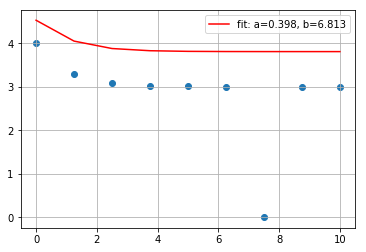

In [160]:
plt.scatter(x_pre, y)
plt.plot(x_pre, f(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.legend()
plt.grid()